## Linear Regression

### Introduction
Linear regression is one of the foundational algorithms in machine learning and statistics. It serves as the starting point for understanding more complex models and neural networks. At its core, linear regression models the relationship between an independent variable $x$ and a dependent variable $y$ by fitting a straight line that best approximates the observed data points.

In the biological analogy to neural networks, the linear regression neuron can be visualized as the simplest form of an artificial neuron: it takes in one or more inputs, applies weights to them, adds a bias, and outputs a continuous value. Unlike classification tasks, where the goal is to categorize inputs, linear regression focuses on predicting continuous values.

The hypothesis function for a linear regression model can be mathematically expressed as:

$$
y = wx + b
$$

Where:
- $y$ is the predicted output
- $w$ is the weight (or slope)
- $x$ is the input feature
- $b$ is the bias (or intercept)

The learning process involves minimizing the prediction error using a cost function, typically Mean Squared Error (MSE):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This cost function measures the average squared difference between actual and predicted values. Optimization is done using gradient descent, where model parameters ($w$ and $b$) are iteratively adjusted to minimize the cost.

Linear regression is widely used in psychology, economics, biology, and various domains where the goal is to model trends or make continuous predictions. Despite its simplicity, it offers strong insights and a solid mathematical foundation for understanding learning algorithms.

### Dataset

The dataset used here is a simplified educational dataset titled **"Student Performance"**, which contains real-world inspired data on students' study habits and academic outcomes. It includes:

- `Hours Studied`: A continuous variable indicating the number of hours a student studied for an assessment.
- `Performance Index`: A numeric score reflecting student performance, which could represent exam results or standardized assessments.

This type of dataset is often used in regression modeling because it reflects a direct, interpretable causal relationship: the more one studies, the better the expected academic performance — though with natural variation.

The goal is to model how study hours affect performance, and assess whether a linear relationship is sufficient to capture this effect.

### Required Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Load and Preview Data
In this section, we load and inspect the "Student Performance" dataset, which contains information on students' study habits and their performance index. This data will be used to explore the relationship between hours studied and performance.

In [28]:
df = pd.read_csv("Student_Performance.csv")
df = df[["Hours Studied", "Performance Index"]].dropna()
df.head()

,Hours Studied,Performance Index
0,7,91.0
1,4,65.0
2,8,45.0
3,5,36.0
4,7,66.0


### Visualize the Raw Data
This step provides a visual inspection of the raw data to observe the initial trend and noise.

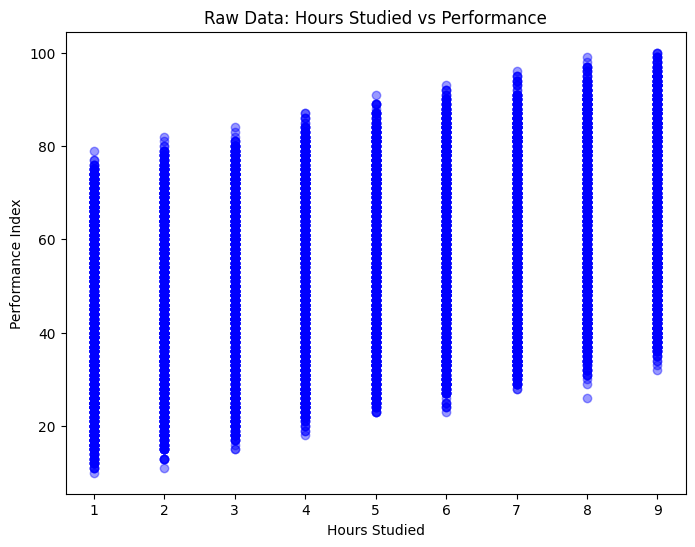

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df["Hours Studied"], df["Performance Index"], color="blue", alpha=0.4)
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Raw Data: Hours Studied vs Performance")
plt.show()

### Linear Regression Model using Gradient Descent

Gradient descent is a first-order optimization algorithm used to minimize a cost function by iteratively updating parameters in the opposite direction of the gradient. In this notebook, we apply gradient descent to minimize the **Mean Squared Error (MSE)** for a linear regression model:

$$
C(w, b) = \frac{1}{2}(wx + b - y)^2
$$

To optimize this cost, we calculate the partial derivatives:

$$
\frac{\partial C}{\partial w} = (wx + b - y) \cdot x
$$

$$
\frac{\partial C}{\partial b} = (wx + b - y)
$$

Then apply the update rules:

$$
w \leftarrow w - \alpha \cdot \frac{\partial C}{\partial w}
$$

$$
b \leftarrow b - \alpha \cdot \frac{\partial C}{\partial b}
$$

Here, $\alpha$ is the learning rate, a small constant that determines the step size for updates. By repeating this process across the dataset (batch gradient descent), we move closer to the parameters that minimize the error between our model predictions and the actual outcomes.

#### A Note on Stochastic Gradient Descent (SGD)

While this notebook uses **batch gradient descent**, another commonly used optimization method is **stochastic gradient descent (SGD)**. The key difference lies in how the gradients are computed:

- **Batch gradient descent** computes the gradient using the **entire dataset** before each parameter update.
- **Stochastic gradient descent** updates the parameters **after every single training example**.

This makes SGD much faster for large datasets and introduces helpful noise into the training process, which can help escape local minima. However, it can also lead to more fluctuations in the learning path. In practice, a middle-ground called mini-batch gradient descent is often used.

In [32]:
X_raw = df[["Hours Studied"]].values
y_raw = df["Performance Index"].values.reshape(-1, 1)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            mse = np.mean((y - y_predicted) ** 2)
            self.loss_history.append(mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

reg_raw = LinearRegression(learning_rate=0.01, epochs=1000)
reg_raw.fit(X_train_raw, y_train_raw)

### Visualize Regression
Here, we overlay the learned regression line onto the raw dataset to visualize how well the model fits the original observations.

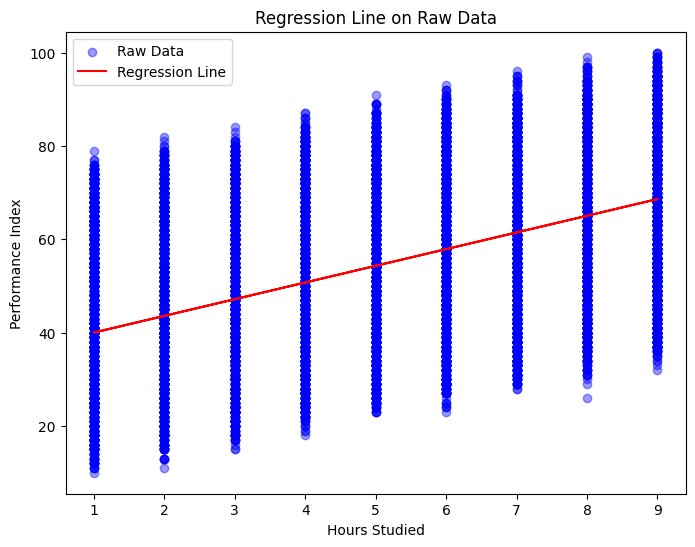

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X_raw, y_raw, color="blue", alpha=0.4, label="Raw Data")
plt.plot(X_raw, reg_raw.predict(X_raw), color="red", label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Line on Raw Data")
plt.legend()
plt.show()

### Evaluate Model on Raw Data
We assess the performance of the model trained on raw data by calculating the mean squared error (MSE), which gives us a numerical estimate of the model's predictive accuracy.

In [36]:
y_pred_raw = reg_raw.predict(X_test_raw)
mse_raw = mean_squared_error(y_test_raw, y_pred_raw)
print(f"Raw Data MSE: {mse_raw:.2f}")

Raw Data MSE: 326.37


##### This is a very high MSE, so we will adjust our data to better show trends.

## **Grouping the Data**
The raw data includes a lot of redundant or closely clustered observations that introduce noise. By grouping data based on the number of hours studied and averaging the performance scores, we create a cleaner dataset. This helps highlight the underlying linear pattern more clearly and reduces overfitting to noisy points.

In [39]:
df_grouped = df.groupby("Hours Studied", as_index=False)["Performance Index"].mean()
df_grouped.head()

,Hours Studied,Performance Index
0,1,44.116319
1,2,46.428571
2,3,49.776586
3,4,52.719816
4,5,55.516453


### Visualize Grouped Data
This plot displays the cleaned and averaged dataset, allowing us to visually confirm a more linear trend suitable for regression modeling.

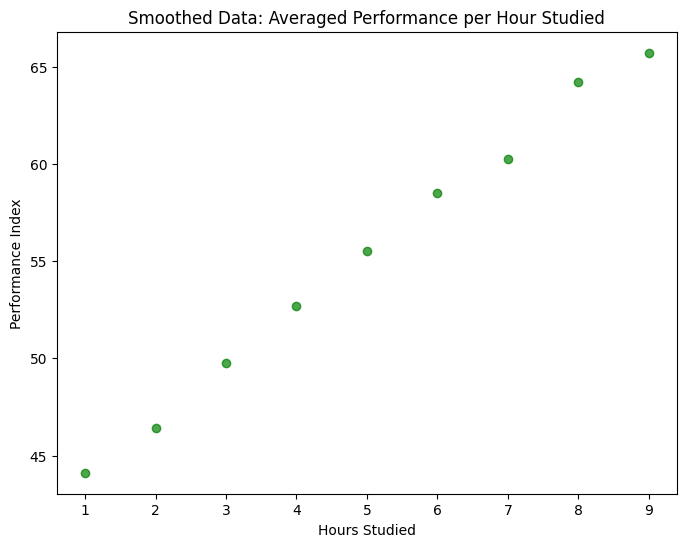

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df_grouped["Hours Studied"], df_grouped["Performance Index"], color="green", alpha=0.7)
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Smoothed Data: Averaged Performance per Hour Studied")
plt.show()

### Prepare and Fit Model on Grouped Data (Track MSE per Epoch)
We train a new linear regression model on the cleaned dataset. During training, we record the model’s MSE at each epoch to track the learning progress and convergence behavior.

In [43]:
X_clean = df_grouped[["Hours Studied"]].values
y_clean = df_grouped["Performance Index"].values.reshape(-1, 1)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

reg_clean = LinearRegression(learning_rate=0.01, epochs=1000)
reg_clean.fit(X_train_clean, y_train_clean)

### Visualize Grouped Data
We overlay the learned regression line onto the cleaned dataset to assess how well the model captures the clearer trend post-grouping.

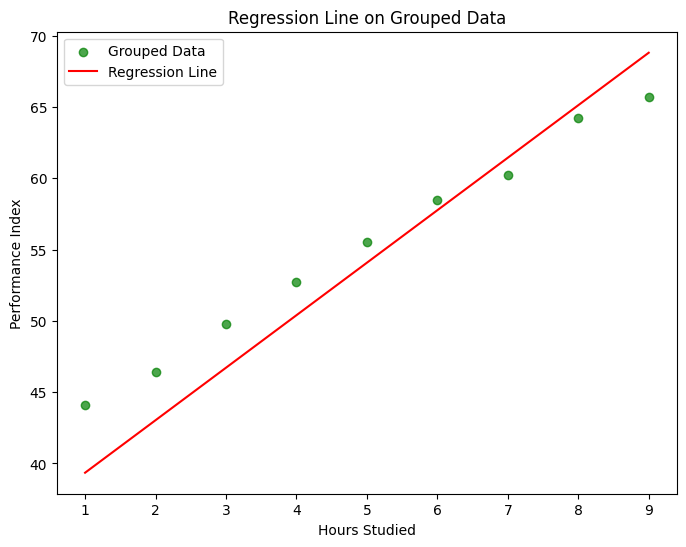

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_clean, y_clean, color="green", alpha=0.7, label="Grouped Data")
plt.plot(X_clean, reg_clean.predict(X_clean), color="red", label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Line on Grouped Data")
plt.legend()
plt.show()

### Evaluate Model on Grouped Data
We evaluate the performance of the model trained on the cleaned data using MSE. This step allows us to compare the effectiveness of training on grouped data versus raw data.

In [47]:
y_pred_clean = reg_clean.predict(X_test_clean)
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
print(f"Grouped Data MSE: {mse_clean:.2f}")

Grouped Data MSE: 6.20


##### This is a much better MSE than the we got with the raw data. Let's see how well our algorithm worked by looking at the MSE over Epochs.

### Plot MSE over Epochs
Plotting the MSE at each epoch gives insight into the optimization process. A steadily decreasing MSE suggests that the gradient descent algorithm is effectively minimizing the cost function and learning appropriate model parameters.

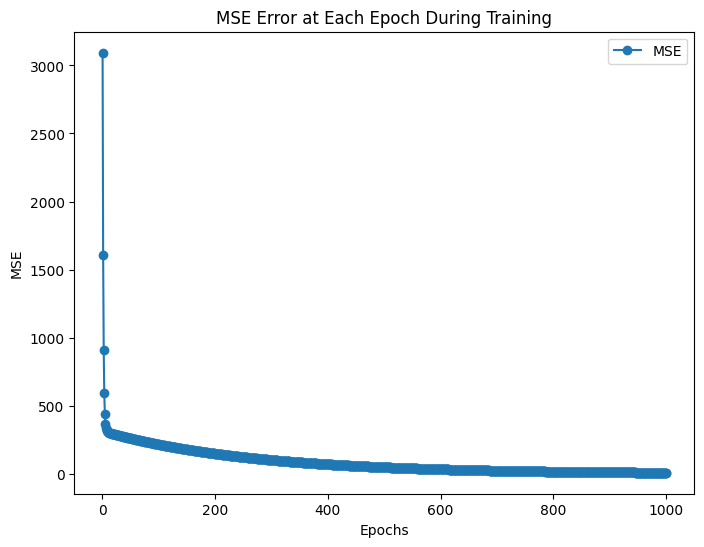

In [50]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(reg_clean.loss_history) + 1), reg_clean.loss_history, label="MSE", marker='o')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE Error at Each Epoch During Training")
plt.legend()
plt.show()

### Conclusion

In this notebook, we implemented and analyzed a linear regression model to predict student performance based on hours studied — a classic example of a continuous input-output relationship. Our goal was to explore how a simple model can learn from data and what preprocessing steps impact its effectiveness.

#### Performance and Model Behavior

Initially, we trained the model on raw data, which resulted in a high **Mean Squared Error (MSE) of 326.37**. The model struggled due to overlapping data points and variance within identical `Hours Studied` values, leading to noisy predictions.

To improve performance, we grouped the dataset by study hours and averaged performance scores within each group. This transformation significantly reduced noise and revealed the underlying linear pattern. As a result, the model trained on the grouped data achieved a much lower **MSE of 6.20**, clearly showing the value of thoughtful preprocessing.

Training dynamics were also visualized: the steady decline in MSE across epochs confirmed that **gradient descent** was functioning effectively to minimize the cost function and converge to optimal parameters.

#### Interpretation and Real-World Relevance

The model found a positive, interpretable relationship: more study hours generally led to better performance. This confirms what educators and students intuitively expect and quantitatively expresses the average effect of effort on academic success.

In practical terms, linear regression could help students estimate how additional study time might impact their performance or assist educators in designing study guidelines. However, this type of model is best viewed as a guiding tool, not a definitive predictor — many other variables influence real-world academic performance.

#### Limitations

- **Univariate focus**: The model only considers `Hours Studied` and ignores confounding factors such as prior GPA, test difficulty, or learning style.
- **Linearity assumption**: Real-world effects may be nonlinear (e.g., diminishing returns after a certain number of hours).
- **Data simplicity**: The dataset is likely synthetic or highly preprocessed, meaning real-world applications could face more noise and bias.
- **Generalization risk**: This model’s performance and insights may not generalize beyond the context of this dataset.

#### Final Reflection

This project illustrates the **strengths and boundaries** of linear regression. It is fast, mathematically elegant, and highly interpretable — yet deeply dependent on data quality. Preprocessing strategies like grouping and outlier control can dramatically improve its performance. Ultimately, this notebook offers a meaningful example of how even basic machine learning tools can uncover valuable patterns and prompt thoughtful reflection on both data and model design.